# **Analysis on Netflix (1925-2021) Dataset**
# **Date: 31st May 2025**
# **Technologies Used: Python, NumPy, Pandas, Matplotlib**

## -o) Import libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## -o) Load dataset

In [37]:
df = pd.read_csv("netflix_titles.csv")



## -o) Basic Information & Cleaning Questions

In [38]:
# Check Data Set Loaded Successfully!
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [39]:
# Understand The Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [40]:
df = df.drop_duplicates() # Drop Duplicate

## How many rows and columns are there in the dataset?

In [41]:
print('Total Numbers of Rows : ',df.shape[0])
print('Total Numbers of Colume : ',df.shape[1])

Total Numbers of Rows :  8807
Total Numbers of Colume :  12



## Which columns have missing values, and what is the count of those missing values?

In [42]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## How would you handle the null values — by dropping or filling them? Justify your approach.

In [43]:
print("I can handle null values by doing drop or fill methodology but it's totally depends on condition of Question")

I can handle null values by doing drop or fill methodology but it's totally depends on condition of Question


## -o) Data visualizations

## **Questions:**
---


### How many shows and movies were released on Netflix each year?
> Create a bar chart showing the total releases for each year.



---



### Compare Movies and TV Shows.


> Create a pie chart that shows the percentage of content that are Movies and the percentage that are TV Shows.


---



### Country-wise content distribution
> Create a bar chart showing the top producing countries.

---



### Analyze the top 5 genres.
> Create a bar chart showing the most popular genres.


/tmp/ipython-input-1733186177.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(TTCountry.index, rotation=22,fontsize = 7)            # labels set karo aur rotate karo
/tmp/ipython-input-1733186177.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][1].set_xticklabels(genres_data.index , rotation = 6,fontsize = 7)


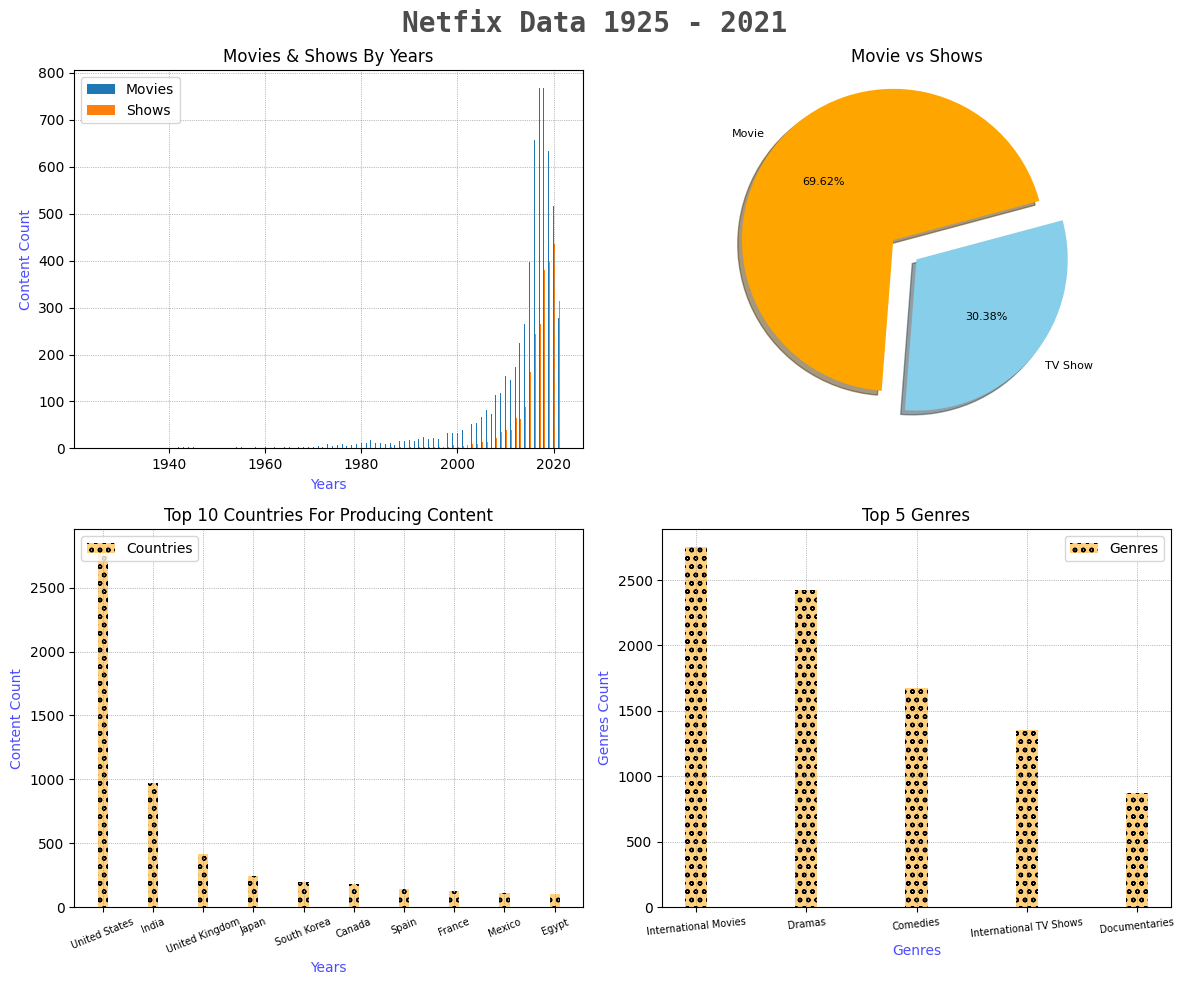

In [70]:
# Figure Size and Subplots Row and Colume
fig,ax = plt.subplots(2,2,figsize = (12,10))
plt.suptitle("Netfix Data 1925 - 2021",fontweight = 800,fontsize = 20,family='monospace',alpha = 0.7)

# 1. How many shows and movies were released on Netflix each year?

count_by_release_year = df.pivot_table(index='release_year' , columns='type' , values='show_id' , aggfunc='count')
# print(count_by_release_year)
movies = []  # Hold Count of all Movies each year
for i in range(len(count_by_release_year)):
    movies.append(count_by_release_year.values[i][0])
shows = []  # Hold Count of all Shows each year
for i in range(len(count_by_release_year)):
    shows.append(count_by_release_year.values[i][1])
width = 0.2
ax[0,0].set_title("Movies & Shows By Years")
ax[0,0].set_xlabel("Years",color = 'blue',alpha = 0.7)
ax[0,0].set_ylabel("Content Count",color = 'blue',alpha = 0.7)
ax[0,0].bar(count_by_release_year.index , movies , width = width , label = 'Movies')
ax[0,0].bar(count_by_release_year.index + width , shows , width = width ,  label = 'Shows')
ax[0,0].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')
ax[0,0].legend(loc=2)


# 2. Compare Movies and TV Shows.
ax[0,1].set_title("Movie vs Shows")
count_Movie_Shows = df['type'].value_counts().sort_values(ascending=False)
ax[0][1].pie(count_Movie_Shows.values ,labels = count_Movie_Shows.index,startangle = 15, textprops={'fontsize': 8}, explode = [0.2,0] ,shadow = True, autopct = '%.2f%%' , colors = ['orange','skyblue'] )



# 3. Top 10 country-wise content distribution.

# print(df[['show_id' , 'release_year']].isnull().sum()) # first check for null data
TTCountry = df['country'].value_counts().sort_values(ascending=False).head(10)
ax[1,0].set_title("Top 10 Countries For Producing Content")
ax[1,0].set_xlabel("Years",color = 'blue',alpha = 0.7)
ax[1,0].set_ylabel("Content Count",color = 'blue',alpha = 0.7)
ax[1,0].bar(TTCountry.index , TTCountry.values , width = width , label = 'Countries',hatch = 'oo' ,color = 'orange',alpha = 0.5)
ax[1,0].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')
ax[1][0].legend(loc=2)
ax[1,0].set_xticklabels(TTCountry.index, rotation=22,fontsize = 7)            # labels set karo aur rotate karo




# 4. Analyze the top 5 genres.

# print(df['listed_in'].isnull().sum()) # first check for null data

genres_data = df['listed_in'].str.split(',').apply(lambda x: [i.strip() for i in x]).explode().value_counts().sort_values(ascending=False).head(5)
ax[1,1].set_title("Top 5 Genres")
ax[1,1].set_xlabel("Genres",color = 'blue',alpha = 0.7)
ax[1,1].set_ylabel("Genres Count",color = 'blue',alpha = 0.7)
ax[1,1].bar(genres_data.index , genres_data.values , width = width , label = 'Genres',hatch = 'oo' ,color = 'orange',alpha = 0.5)
ax[1,1].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')
ax[1][1].legend(loc=1)
ax[1][1].set_xticklabels(genres_data.index , rotation = 6,fontsize = 7)

plt.tight_layout()
# plt.savefig("Graph_1.png",dpi = 300)
plt.show()

## **Questions:**
---


### How many shows/movies are there for each rating (G, PG, TV-MA, etc.)?
> Create a horizontal bar chart showing the rating-wise distribution.



---



### Director-wise content distribution.


> Create a bar chart for the top 10 directors whose names appear most frequently.
---



### Count the TV Shows for each country (only for TV Shows).
> Create a country-wise bar chart, but only by filtering for type == "TV Show".

---



### Year-wise content trends of only Documentaries How many Documentaries were released each year?
> Where the listed_in column contains "Documentaries"








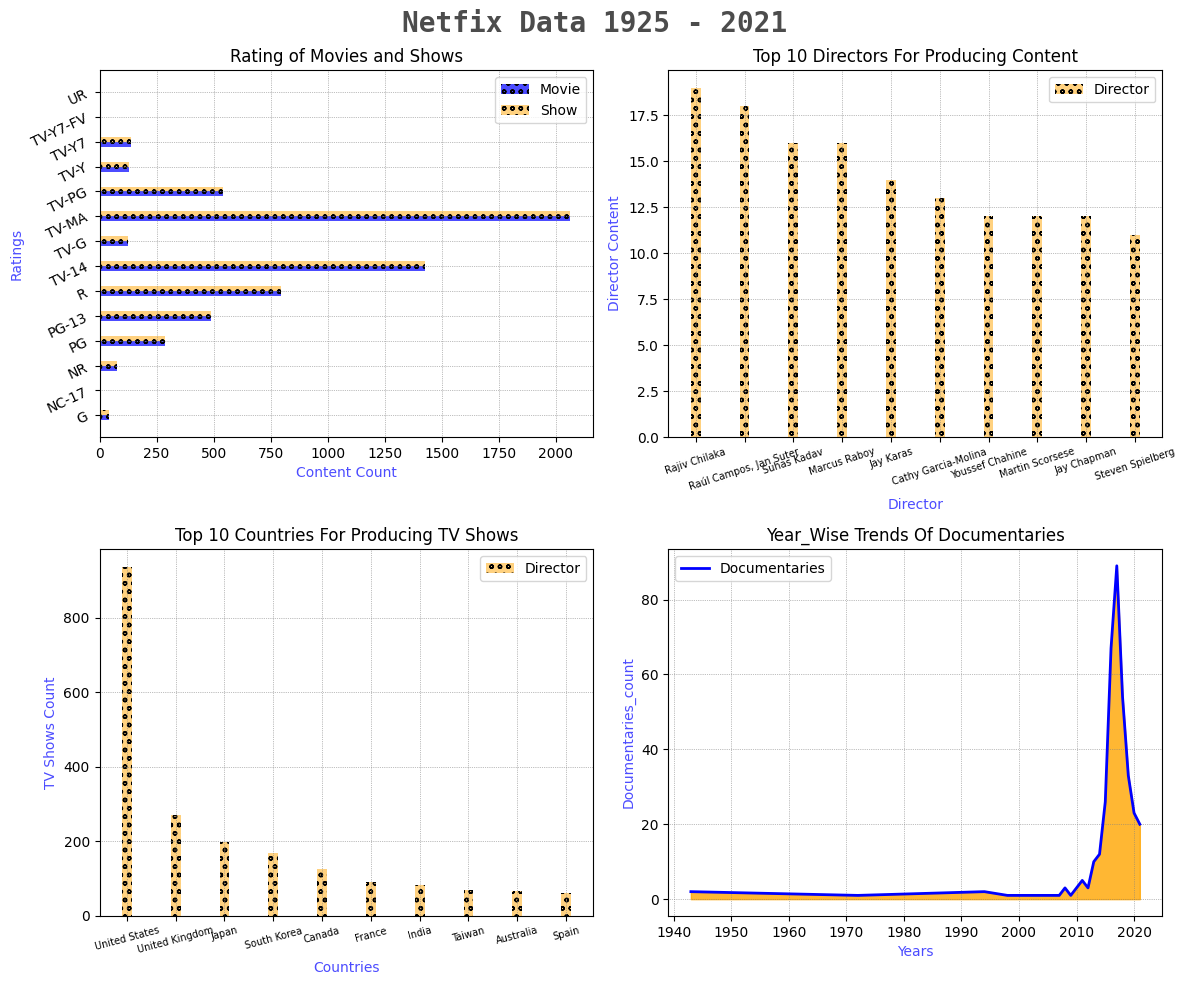

In [71]:
# Figure Size and Subplots Row and Colume
fig,ax = plt.subplots(2,2,figsize = (12,10))
plt.suptitle("Netfix Data 1925 - 2021",fontweight = 800,fontsize = 20,family='monospace',alpha = 0.7)



# 5. How many shows/movies are there for each rating (G, PG, TV-MA, etc.)?

# print(df['rating'].isnull().sum()) # found_Null Data so remove first
rating_df = df.copy()
drop_index =  rating_df[(rating_df['rating'] == '74 min') | (rating_df['rating'] == '84 min') | (rating_df['rating'] == '66 min')].index
rating_df.drop(drop_index , axis = 0 ,inplace=True)
main_rating_data = rating_df.pivot_table(index='rating' , columns='type' , values='show_id' , aggfunc='count')

movies = []
for i in range(len(main_rating_data)):
    movies.append(main_rating_data.values[i][0])
shows = []
for i in range(len(main_rating_data)):
    shows.append(main_rating_data.values[i][1])

width = 0.2
lengthSpace = np.arange(len(main_rating_data.index))
# print(lengthSpace)
ax[0,0].set_title("Rating of Movies and Shows")
ax[0,0].set_xlabel("Content Count",color = 'blue',alpha = 0.7)
ax[0,0].set_ylabel("Ratings",color = 'blue',alpha = 0.7)
ax[0,0].barh(lengthSpace , movies , width ,hatch = 'oo',label = 'Movie',alpha = 0.7, color = 'blue')
ax[0,0].barh(lengthSpace + width , movies , width ,hatch = 'oo' , label = 'Show' , alpha = 0.5 , color = 'orange')
ax[0,0].set_yticks(lengthSpace + width/2 , main_rating_data.index )
ax[0,0].set_yticklabels(main_rating_data.index,rotation = 25)
ax[0,0].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')
ax[0][0].legend(loc=1)



# 6. Director-wise content distribution.
# directors = df['director'].isnull().sum() # Check Null Values of Directors not nescessay for this particular Question
directors = df['director'].value_counts().sort_values(ascending=False).head(10)
ax[0,1].set_title("Top 10 Directors For Producing Content")
ax[0,1].set_xlabel("Director",color = 'blue',alpha = 0.7)
ax[0,1].set_ylabel("Director Content",color = 'blue',alpha = 0.7)
ax[0,1].bar(directors.index , directors.values , width = width , label = 'Director',hatch = 'oo' ,color = 'orange',alpha = 0.5)
ax[0,1].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')
ax[0,1].legend(loc=1)
ax[0,1].set_xticks(range(len(directors.index)))
ax[0,1].set_xticklabels(directors.index,rotation = 18,fontsize = 7)


# 7. Count the TV Shows for each country (only for TV Shows).
data = df.dropna(subset='country').copy() # Not Compulsary tu clean data
data['country'] = data['country'].str.split(',').apply(lambda x: [i.strip() for i  in x])
data = data.explode('country')
data = data[data['country'] != '']
country_shows = data[data['type'] == 'TV Show'].groupby('country')['show_id'].count().sort_values(ascending=False).head(10)
ax[1,0].set_title("Top 10 Countries For Producing TV Shows")
ax[1,0].set_xlabel("Countries",color = 'blue',alpha = 0.7)
ax[1,0].set_ylabel("TV Shows Count",color = 'blue',alpha = 0.7)
ax[1,0].bar(country_shows.index , country_shows.values , width = width , label = 'Director',hatch = 'oo' ,color = 'orange',alpha = 0.5)
ax[1,0].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')
ax[1,0].legend(loc=1)
ax[1,0].set_xticks(range(len(country_shows.index)))
ax[1,0].set_xticklabels(country_shows.index,rotation = 15,fontsize = 7)


# 8. Year-wise content trends of only Documentaries How many Documentaries were released each year?

documentries_data = df[df['listed_in'] == 'Documentaries'].groupby('release_year')['listed_in'].count()
ax[1,1].set_title("Year_Wise Trends Of Documentaries")
ax[1,1].set_xlabel("Years",color = 'blue',alpha = 0.7)
ax[1,1].set_ylabel("Documentaries_count",color = 'blue',alpha = 0.7)
ax[1,1].plot(documentries_data.index , documentries_data.values , label = 'Documentaries',color = 'b',linewidth = 2)
ax[1,1].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')
ax[1,1].legend(loc=2)
ax[1,1].fill_between(documentries_data.index , documentries_data.values,color = 'orange' , alpha = 0.8)

plt.tight_layout()
# plt.savefig("Graph_2.png",dpi = 300)
plt.show()

## **Questions:**
---


### Analyze Movies based on Duration
> Extract the duration in minutes for movies.



---



### Monthly Release Trend
> Extract the month from the 'date_added' column.

/tmp/ipython-input-162249599.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_df['date_added'] = pd.to_datetime(date_df['date_added'], errors='coerce')  #Convert Date into int date formate from str date format
/tmp/ipython-input-162249599.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(month_trend.index,rotation = 15,fontsize = 7)


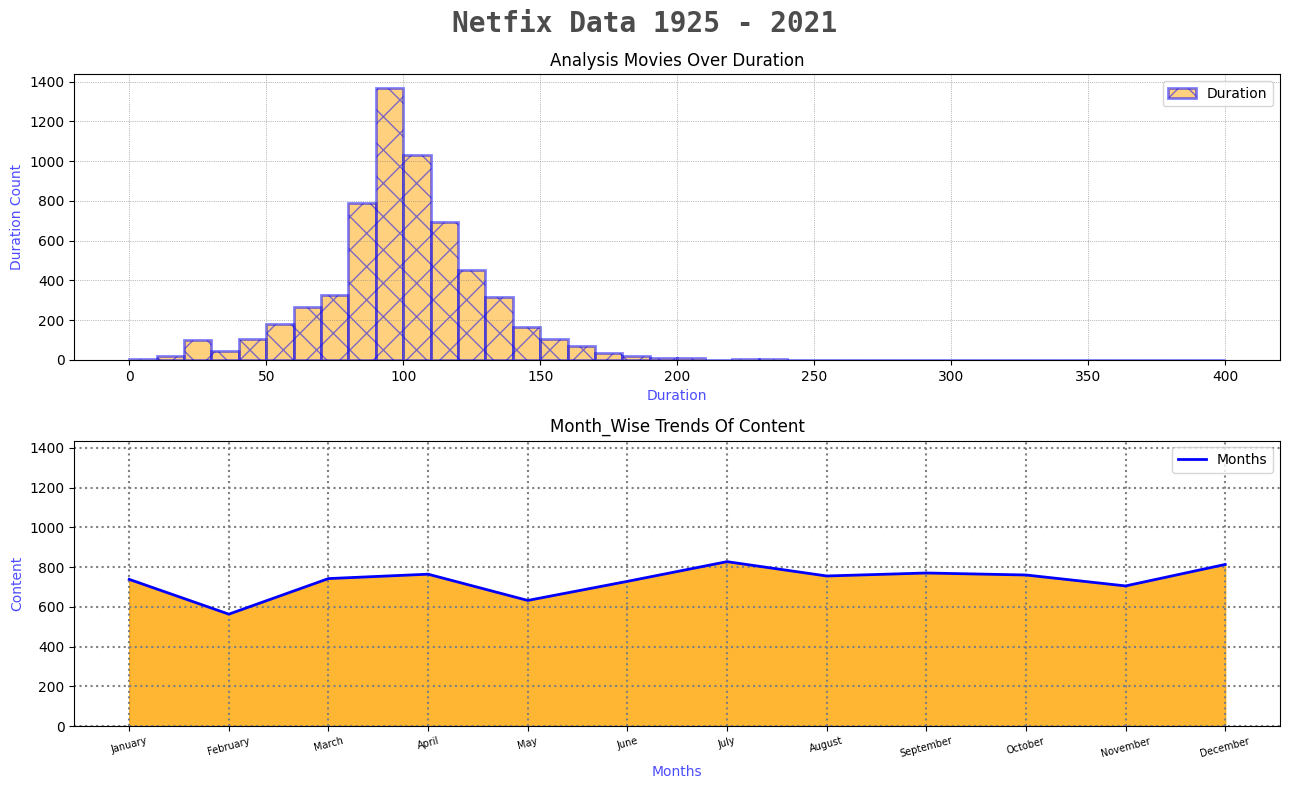

In [69]:

fig , ax = plt.subplots(2,1 , figsize = (13,8),sharey = True)
plt.suptitle("Netfix Data 1925 - 2021",fontweight = 800,fontsize = 20,family='monospace',alpha = 0.7)



# 9. Analyze Movies based on Duration

# print(df[df['duration'].isnull()].index) Null Value index in df['duration]
# print(df.loc[df[df['duration'].isnull()].index,['type' , 'duration']])

data = df[df['type'] == 'Movie'].copy()
# print(len(data['type']))
data['duration'] = data[data['duration'].str.contains('min' , na=False)]['duration']
data.dropna(subset='duration',inplace=True)
data['duration'] = data['duration'].str.replace('min','').astype(int)
ax[0].set_title("Analysis Movies Over Duration")
ax[0].set_xlabel("Duration",color = 'blue',alpha = 0.7)
ax[0].set_ylabel("Duration Count",color = 'blue',alpha = 0.7)
ax[0].hist(data['duration'],bins = [i for i in range(0,401,10)],alpha=0.5,linewidth = 2,edgecolor = 'blue',color = 'orange',hatch = 'x' ,label='Duration')
ax[0].legend()
ax[0].grid(linestyle = ':' , linewidth = 0.5 , color = 'grey')



# 10. Monthly Release Trend

# print(df['date_added'].isnull().sum())
date_df = df.copy()  # Copy data
# print(date_df[date_df['date_added'].isnull()]['date_added']) # Get index of Null data in date_added colume
date_df.dropna(subset='date_added',inplace=True) # Remove All Null Values
date_df['date_added'] = pd.to_datetime(date_df['date_added'], errors='coerce')  #Convert Date into int date formate from str date format
date_df['date_added'] = date_df['date_added'].dt.month_name()  # now converted number to month name
month_trend = date_df.groupby('date_added')['show_id'].count() # count no. of conent with respect to months
# print(month_trend)
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
month_trend = month_trend.reindex(month_order)
# print(month_trend)
ax[1].set_title("Month_Wise Trends Of Content")
ax[1].set_xlabel("Months",color = 'blue',alpha = 0.7)
ax[1].set_ylabel("Content",color = 'blue',alpha = 0.7)
ax[1].plot(month_trend.index , month_trend.values , label = 'Months',color = 'b',linewidth = 2)
ax[1].grid(linestyle = ':' , linewidth = 1.5 , color = 'grey')
ax[1].legend(loc=1)
ax[1].fill_between(month_trend.index , month_trend.values,color = 'orange' , alpha = 0.8)
ax[1].set_xticklabels(month_trend.index,rotation = 15,fontsize = 7)


# plt.tight_layout()
# plt.savefig("Graph_3.png",dpi = 300)


plt.tight_layout()
plt.show()